In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=(10,6)

In [2]:
train_dir=r'C:/Users/kavin/OneDrive/Desktop/DL Project/Data set, Presentation and Python Notebook for Image recognition project module/cats_and_dogs/train'
test_dir=r'C:/Users/kavin/OneDrive/Desktop/DL Project/Data set, Presentation and Python Notebook for Image recognition project module/cats_and_dogs/test'
validation_dir=r'C:/Users/kavin/OneDrive/Desktop/DL Project/Data set, Presentation and Python Notebook for Image recognition project module/cats_and_dogs/train'

In [3]:
#for converting images into values
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#Generating batches of tensor image data
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator=test_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [6]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
from tensorflow.keras import optimizers
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)

In [9]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

#In future- use Model.fit instead of model.fit_generator()

C:\Users\kavin\AppData\Local\Temp\ipykernel_9940\2603361523.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/20
100/100 [==============================] - 91s 896ms/step - loss: 0.6916 - acc: 0.5230 - val_loss: 0.6776 - val_acc: 0.6140
Epoch 2/20
100/100 [==============================] - 65s 654ms/step - loss: 0.6720 - acc: 0.5785 - val_loss: 0.6568 - val_acc: 0.6100
Epoch 3/20
100/100 [==============================] - 57s 572ms/step - loss: 0.6518 - acc: 0.6115 - val_loss: 0.6234 - val_acc: 0.6750
Epoch 4/20
100/100 [==============================] - 53s 533ms/step - loss: 0.6212 - acc: 0.6545 - val_loss: 0.5833 - val_acc: 0.7130
Epoch 5/20
100/100 [==============================] - 53s 532ms/step - loss: 0.5896 - acc: 0.6755 - val_loss: 0.5648 - val_acc: 0.7160
Epoch 6/20
100/100 [==============================] - 57s 575ms/step - loss: 0.5668 - acc: 0.7050 - val_loss: 0.5350 - val_acc: 0.7460
Epoch 7/20
100/100 [==============================] - 57s 574ms/step - loss: 0.5457 - acc: 0.7225 - val_loss: 0.5630 - val_acc: 0.6900
Epoch 8/20
100/100 [==============================] - 5

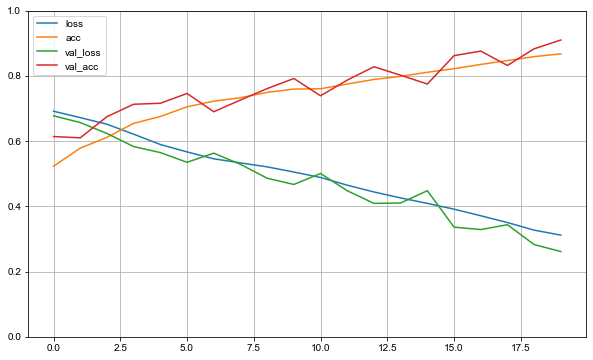

In [10]:
pd.DataFrame(history.history).plot(figsize=(10,6))
import seaborn as sns
sns.set_style('darkgrid')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
from tensorflow.keras import backend as K
K.clear_session()
del model

## VGG16

In [15]:
from tensorflow.keras.applications import VGG16 
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

58889256/58889256 [==============================] - 6s 0us/step


In [16]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [13]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator=test_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [32]:
from tensorflow.keras import optimizers
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    metrics=['acc']
)

In [33]:
checkpoint=keras.callbacks.ModelCheckpoint("CNN_Real_Time_Project-{epoch:02d}.h5")

In [35]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[checkpoint]
)

C:\Users\kavin\AppData\Local\Temp\ipykernel_9940\456502326.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/10
100/100 [==============================] - 679s 7s/step - loss: 0.4450 - acc: 0.7805 - val_loss: 0.2062 - val_acc: 0.9180
Epoch 2/10
 49/100 [=============>................] - ETA: 5:37 - loss: 0.3009 - acc: 0.8765

KeyboardInterrupt: 

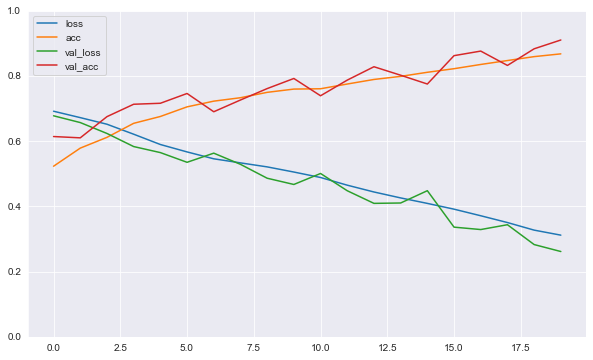

In [36]:
pd.DataFrame(history.history).plot(figsize=(10,6))
import seaborn as sns
sns.set_style('darkgrid')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
hist_df=pd.DataFrame(history.history)

In [38]:
hist_csv_file='history.csv'
with open(hist_csv_file,mode='w') as f:
    hist_df.to_csv(f)

In [39]:
test_generator=test_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [40]:
model.evaluate_generator(test_generator,steps=50)

C:\Users\kavin\AppData\Local\Temp\ipykernel_9940\2075860562.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator,steps=50)


[0.1498795449733734, 0.9490000009536743]